#Conexión a drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

In [ ]:
datos=pd.read_excel("/content/drive/MyDrive/Taller_MAEC_INEGI_Bases/Data.xlsx")
datos # en billiones de dolares

,Company,Sales,Profits,Assets
0,Citigroup,108,17,1484
1,General_Electric,152,16,750
2,AIM,95,10,766
3,Bank_of_America,65,14,1110
4,HSBC_Group,62,9,1031
5,ExxonMobil,263,25,195
6,Royal_Dutch_Shell,265,18,193
7,BP,285,15,191
8,ING_Group,92,8,1175
9,Toyota_Motor,165,11,211


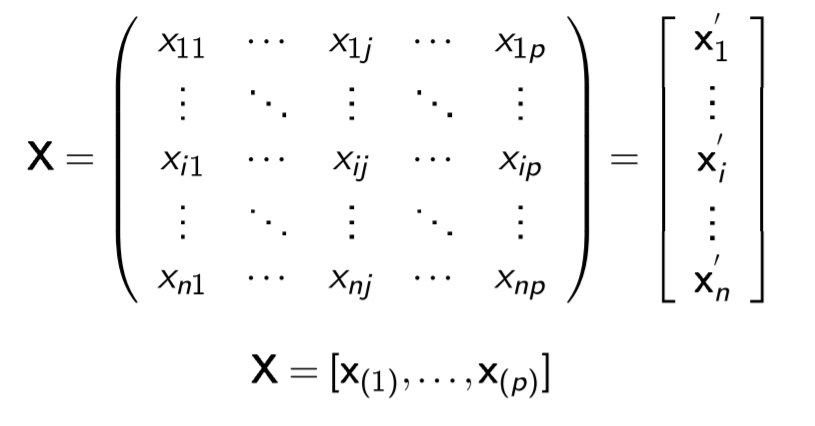

In [ ]:
#Para trabajar con matrices debemos convertir nuestros datos a arreglo numpy
import numpy as np
print(type(datos))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
X=np.asarray(datos.drop(columns=['Company']))
print(type(X))
print(X.shape)
X

<class 'numpy.ndarray'>
(10, 3)


array([[ 108,   17, 1484],
       [ 152,   16,  750],
       [  95,   10,  766],
       [  65,   14, 1110],
       [  62,    9, 1031],
       [ 263,   25,  195],
       [ 265,   18,  193],
       [ 285,   15,  191],
       [  92,    8, 1175],
       [ 165,   11,  211]])

In [ ]:
dim = np.shape(X)
n = dim[0]
p = dim[1]
print(n,p)

10 3


In [ ]:
#vectores
x1=X[:,0]
print(x1.shape)
x1=x1.reshape((10,1))
print(x1.shape)
x1

(10,)
(10, 1)


array([[108],
       [152],
       [ 95],
       [ 65],
       [ 62],
       [263],
       [265],
       [285],
       [ 92],
       [165]])

##Vector de medias

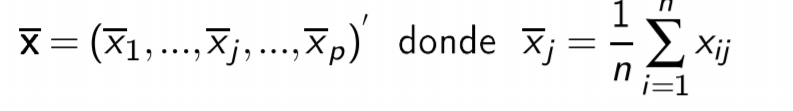

In [ ]:
x_mean=X.mean(axis=0)
print(x_mean.shape)
x_mean

(3,)


array([155.2,  14.3, 710.6])

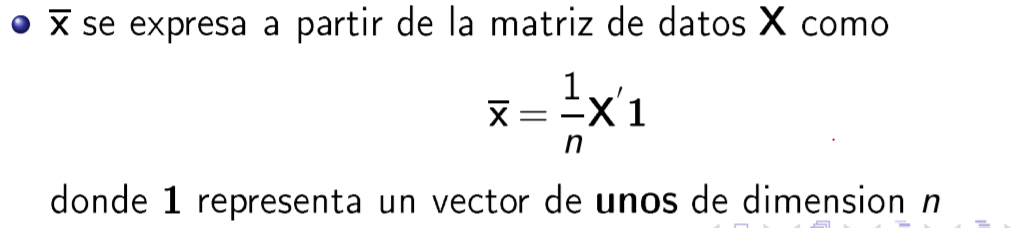

In [ ]:
x_mean = (1/n)*np.transpose(X)@np.ones([n,1])
print(x_mean.shape)
x_mean
# (1/n)*np.matmul(X.T,np.ones([n,1]))

(3, 1)


array([[155.2],
       [ 14.3],
       [710.6]])

## Matriz de varianza-covarianza

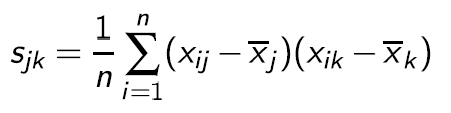

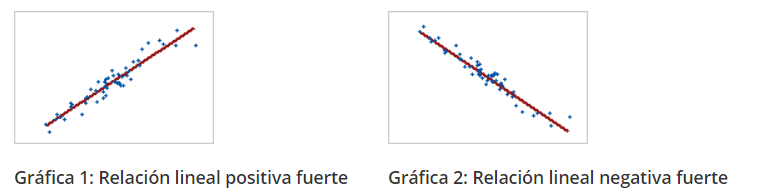

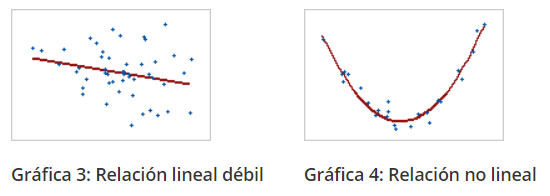

In [ ]:
S = np.cov(np.transpose(X),bias=True) #Esta función divide entre n
S


array([[ 6.7299600e+03,  2.6634000e+02, -3.1995720e+04],
       [ 2.6634000e+02,  2.3610000e+01, -8.9738000e+02],
       [-3.1995720e+04, -8.9738000e+02,  2.1339504e+05]])

In [ ]:
np.cov(np.transpose(X),bias=False) #Esta función divide entre n-1

array([[ 7.47773333e+03,  2.95933333e+02, -3.55508000e+04],
       [ 2.95933333e+02,  2.62333333e+01, -9.97088889e+02],
       [-3.55508000e+04, -9.97088889e+02,  2.37105600e+05]])

In [ ]:
# tambien se puede transponer con .T
X.T

array([[ 108,  152,   95,   65,   62,  263,  265,  285,   92,  165],
       [  17,   16,   10,   14,    9,   25,   18,   15,    8,   11],
       [1484,  750,  766, 1110, 1031,  195,  193,  191, 1175,  211]])

## Matriz de datos centrados $\tilde{X}$

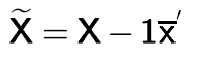

In [ ]:
X_cen=X-np.ones([n,1])@x_mean.T
X_cen

array([[-4.720e+01,  2.700e+00,  7.734e+02],
       [-3.200e+00,  1.700e+00,  3.940e+01],
       [-6.020e+01, -4.300e+00,  5.540e+01],
       [-9.020e+01, -3.000e-01,  3.994e+02],
       [-9.320e+01, -5.300e+00,  3.204e+02],
       [ 1.078e+02,  1.070e+01, -5.156e+02],
       [ 1.098e+02,  3.700e+00, -5.176e+02],
       [ 1.298e+02,  7.000e-01, -5.196e+02],
       [-6.320e+01, -6.300e+00,  4.644e+02],
       [ 9.800e+00, -3.300e+00, -4.996e+02]])

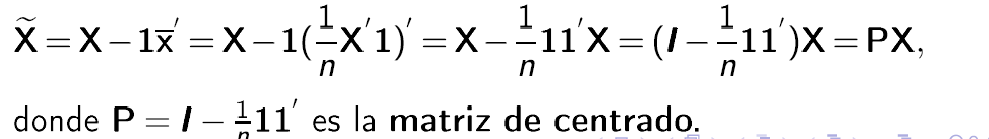

## Matriz de centrado $P$

In [ ]:
P = np.identity(n) - (1/n)*(np.ones([n,1])@ np.ones([1,n]))
P@X
np.matmul(P,X)

array([[-4.720e+01,  2.700e+00,  7.734e+02],
       [-3.200e+00,  1.700e+00,  3.940e+01],
       [-6.020e+01, -4.300e+00,  5.540e+01],
       [-9.020e+01, -3.000e-01,  3.994e+02],
       [-9.320e+01, -5.300e+00,  3.204e+02],
       [ 1.078e+02,  1.070e+01, -5.156e+02],
       [ 1.098e+02,  3.700e+00, -5.176e+02],
       [ 1.298e+02,  7.000e-01, -5.196e+02],
       [-6.320e+01, -6.300e+00,  4.644e+02],
       [ 9.800e+00, -3.300e+00, -4.996e+02]])

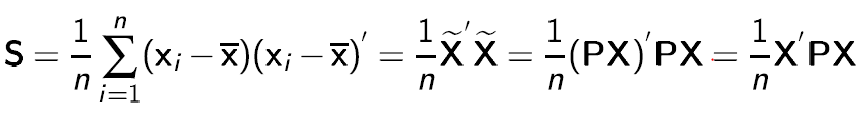

In [ ]:
# Matriz S usando matriz de datos centrados
(1/n)*X_cen.T@X_cen

array([[ 6.7299600e+03,  2.6634000e+02, -3.1995720e+04],
       [ 2.6634000e+02,  2.3610000e+01, -8.9738000e+02],
       [-3.1995720e+04, -8.9738000e+02,  2.1339504e+05]])

In [ ]:
# Matriz S usando matriz de datos centrados
(1/n)*X.T@P@X

array([[ 6.7299600e+03,  2.6634000e+02, -3.1995720e+04],
       [ 2.6634000e+02,  2.3610000e+01, -8.9738000e+02],
       [-3.1995720e+04, -8.9738000e+02,  2.1339504e+05]])

## Traza

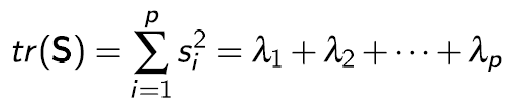

In [ ]:
TR=np.diag(S)
print(TR,'\n')

[7.47773333e+03 2.62333333e+01 2.37105600e+05] 



## Varianza generalizada

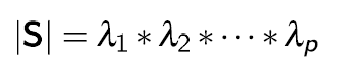

In [ ]:
np.linalg.det(S) #si el determinante es igual a cero significa que hay colinealidad (si una o mas variables con combinacion lineal de otra)

6137714769.711912

##Matriz de correlación

In [ ]:
np.corrcoef(X.T)

array([[ 1.        ,  0.6681626 , -0.84429358],
       [ 0.6681626 ,  1.        , -0.39979396],
       [-0.84429358, -0.39979396,  1.        ]])

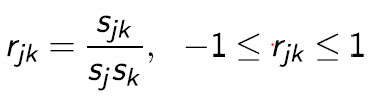

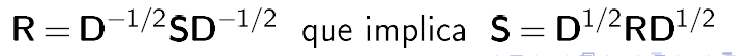

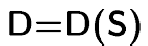

In [ ]:
D=np.diag(np.diag(S))
print(D)

[[6.7299600e+03 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 2.3610000e+01 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 2.1339504e+05]]


In [ ]:
np.power(D,-1/2) #1/0 = inf

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in power
  """Entry point for launching an IPython kernel.


array([[0.01156418,        inf,        inf],
       [       inf, 0.19524201,        inf],
       [       inf,        inf, 0.00205366]])

In [ ]:
D_1_2=np.diag(np.diag(S)**(-1/2))  
R=D_1_2@S@D_1_2
print(R)

[[ 1.          0.6681626  -0.84429358]
 [ 0.6681626   1.         -0.39979396]
 [-0.84429358 -0.39979396  1.        ]]


In [ ]:
D1_2=np.diag(np.diag(S)**(1/2))  
D1_2@R@D1_2

array([[ 7.47773333e+03,  2.95933333e+02, -3.55508000e+04],
       [ 2.95933333e+02,  2.62333333e+01, -9.97088889e+02],
       [-3.55508000e+04, -9.97088889e+02,  2.37105600e+05]])

In [ ]:
S

array([[ 7.47773333e+03,  2.95933333e+02, -3.55508000e+04],
       [ 2.95933333e+02,  2.62333333e+01, -9.97088889e+02],
       [-3.55508000e+04, -9.97088889e+02,  2.37105600e+05]])

## Estandarización de datos


In [ ]:
# Z = P X D^{-1/2}                               
Z = P@X@D_1_2
Z

array([[-0.57535482,  0.55566849,  1.674218  ],
       [-0.03900711,  0.34986535,  0.08529117],
       [-0.73382119, -0.88495352,  0.11992718],
       [-1.09951282, -0.06174094,  0.86460133],
       [-1.13608198, -1.09075667,  0.69358605],
       [ 1.3140519 ,  2.20209365, -1.11614533],
       [ 1.33843134,  0.76147164, -1.12047484],
       [ 1.58222576,  0.1440622 , -1.12480434],
       [-0.77039035, -1.29655981,  1.00531011],
       [ 0.11945926, -0.67915038, -1.08150933]])

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
scaler.fit_transform(X)
#POR DEFAULT USA LA S que esta dividida ente n

array([[-0.57535482,  0.55566849,  1.674218  ],
       [-0.03900711,  0.34986535,  0.08529117],
       [-0.73382119, -0.88495352,  0.11992718],
       [-1.09951282, -0.06174094,  0.86460133],
       [-1.13608198, -1.09075667,  0.69358605],
       [ 1.3140519 ,  2.20209365, -1.11614533],
       [ 1.33843134,  0.76147164, -1.12047484],
       [ 1.58222576,  0.1440622 , -1.12480434],
       [-0.77039035, -1.29655981,  1.00531011],
       [ 0.11945926, -0.67915038, -1.08150933]])